In [3]:
dataframe = pd.read_csv("zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


# Convert the data type of column rate

In [10]:
dataframe['rate'].dtype

dtype('O')

In [11]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
    
dataframe['rate'] = dataframe['rate'].apply(handlerate)    

In [12]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [13]:
dataframe['rate'].dtype

dtype('float64')

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


##  Q1 What type of restaurant do the majority of customers order from ?

In [15]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\Shivam agarwal\AppData\Local\Temp\ipykernel_14020\2430783831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataframe['listed_in(type)'] , palette = ["m","b","g","r"])


Text(0.5, 0, 'Type of restaurant')

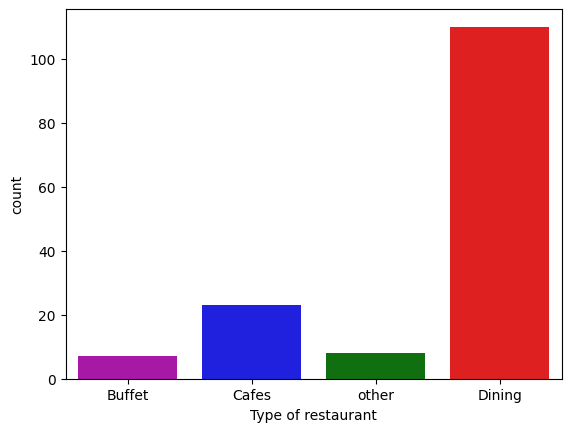

In [16]:
sns.countplot(x = dataframe['listed_in(type)'] , palette = ["m","b","g","r"])
plt.xlabel("Type of restaurant")              

# Conclusion : Majority of the restaurant falls in Dinning category

## Q2 : How many votes has each type of restaurant received from customers ?

In [17]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

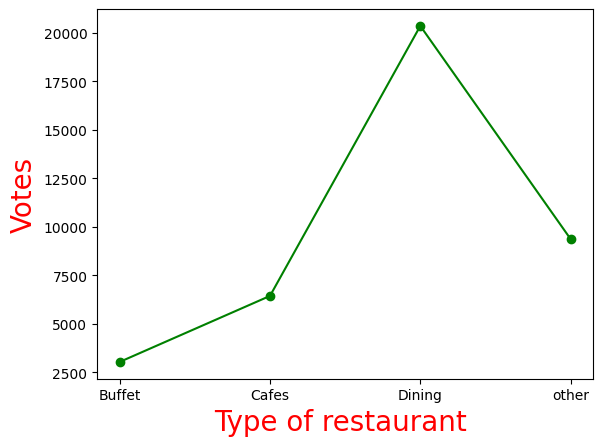

In [18]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result , c = "green" , marker = "o")
plt.xlabel("Type of restaurant " , c = "red" , size = 20)
plt.ylabel("Votes" , c = "red" , size = 20)

# Conclusion : Dinning restaurants has received maximum votes

## Q3 : What are the ratings that the majority of restaurants have received

In [19]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


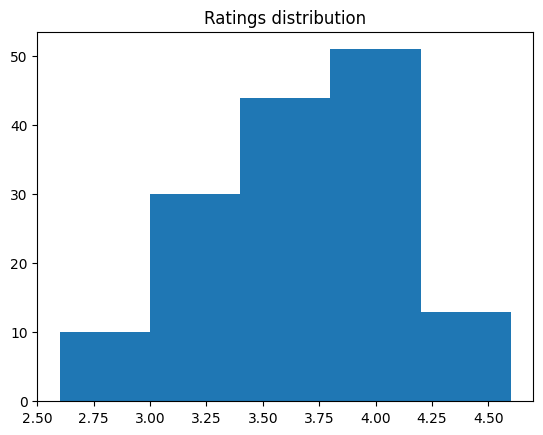

In [20]:
plt.hist(dataframe['rate'] , bins = 5)
plt.title("Ratings distribution")
plt.show()

# Conclusion : the Majority restaurants has received ratings from 3.5 to 4

## Q4 : Zomato has obseved that most couples order most of their food online . what is their average spending on each order ?

In [21]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

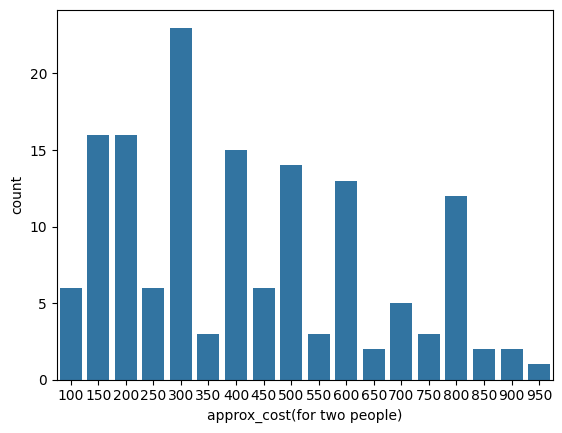

In [22]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)

# Conclusion : the Majority of couples preferr restaurants with an approximate cost of 300 rupees

## Q5 : Which mode has recieved the maximum rating

In [25]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

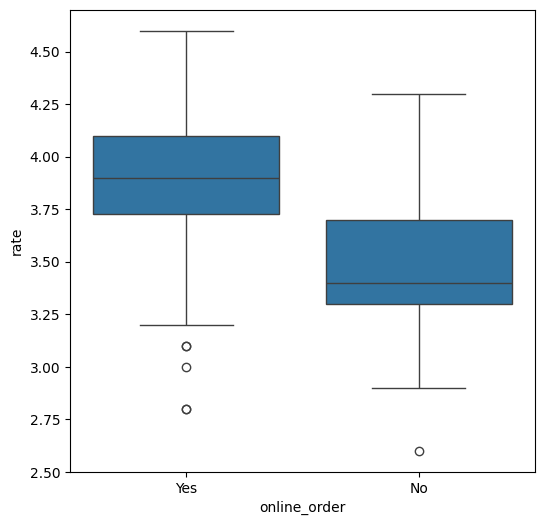

In [28]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order' , y = 'rate' , data = dataframe)

# Conclusion : offline order receive lower rating in comparison to online order 

## Q6 : Which type of restaurant received more offline orders , so that zomato can predicts it customers with some good offers

In [29]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


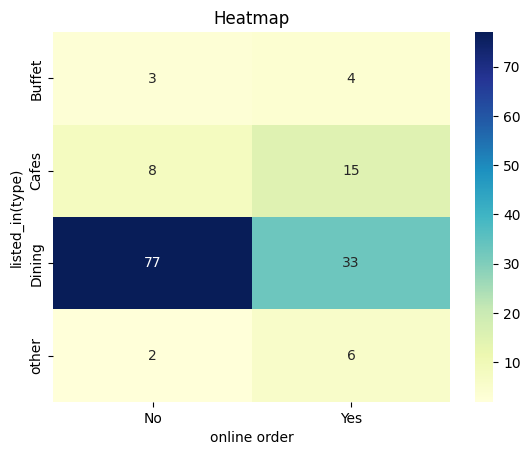

In [31]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)' , columns = 'online_order', aggfunc = 'size' , fill_value = 0)
sns.heatmap(pivot_table , annot = True , cmap = "YlGnBu" , fmt = 'd')
plt.title('Heatmap')
plt.xlabel('online order')
plt.ylabel('listed_in(type)')
plt.show()

# Conclusion : Dining restaurants primarly accepts offline order, whereas cafes primarly receive online order . This suggests that client preferred to place order in person at restaurant , but prefer online ordering in cafes